<a href="https://colab.research.google.com/github/fabnancyuhp/RENDUPYTHONISFSTAT/blob/master/Exercise_Chapitre_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice mélange de loi

In [0]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
import scipy
import csv
import os
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

1/ Simuler un mélange de loi de taille 1000. Ce mélange de loi aura 3 lois. Chaque loi sera simulé par des vecteurs gaussiens de dimention 2. Les moyennes de ces classes sont respectivement (1,1), (3,3), (5,5). Les covarainces de ces 3 classes sont des matrices diagonales avec des 1. La probabilité d'apparition de ces classes est respectivement 1/4,1/4,1/2. Ce mélange deloi sera stocke dans MIX_DATA. 

In [0]:
np.random.seed(seed=1998)
n = 1000

X_1 = np.random.multivariate_normal(mean=np.array([1, 1]),
                                  cov=np.array([[1, 0], [0, 1]]),
                                  size=n)

X_2 = np.random.multivariate_normal(mean=np.array([3, 3]),
                                  cov=np.array([[1, 0], [0, 1]]),
                                  size=n)


X_3 = np.random.multivariate_normal(mean=np.array([5, 5]),
                                  cov=np.array([[1, 0], [0, 1]]),
                                  size=n)

proba = np.array([1/4, 1/4, 1/2])

selection = np.random.choice(np.array([1, 2, 3]), size=n, replace=True, p=proba)

X_1 = X_1[selection == 1]
X_2 = X_2[selection == 2]
X_3 = X_3[selection == 3]

MIX_DATA = np.concatenate([X_1, X_2, X_3])
MIX_DATA[0:2]

array([[2.53934408, 1.34994264],
       [1.63338885, 0.44308394]])

2/ En vous inspirant de l'exemple ci_dessus appliquer la régle du coude pour déterminer le nombre de cluster optimum.

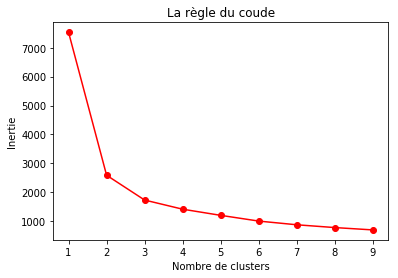

In [0]:
inertia = []
nb_clus = np.arange(1, 10)

for k in nb_clus:
    inertia.append(KMeans(n_clusters=k, max_iter=1000, n_init=50).fit(MIX_DATA).inertia_)

plt.plot(nb_clus, inertia, 'ro-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('La règle du coude')
plt.show()

3/ Fait un kmean à 3 classes sur les données MIX_DATA. 

In [0]:
kmeans = KMeans(n_clusters=3, max_iter=1000, n_init=1000).fit(MIX_DATA)

4/ Faite une représentation mettant en évidence les 3 classes. (on utilise pas le TSNE). Vous devez obtenir un graphique semblable à celui ci-dessous.

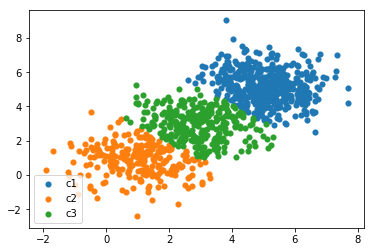

In [0]:
cat = kmeans.predict(MIX_DATA)
c1 = MIX_DATA[cat == 0]
c2 = MIX_DATA[cat == 1]
c3 = MIX_DATA[cat == 2]

plt.scatter(c1[:, 0], c1[:, 1], label='c1', lw=0.1)
plt.scatter(c2[:, 0], c2[:, 1], label='c2', lw=0.1)
plt.scatter(c3[:, 0], c3[:, 1], label='c3', lw=0.1)
plt.legend(loc=3)
plt.show()

5/Faite une représentation mettant en évidence les pattern produits par le modèle kmeans de la question 3.

6/ Faire classification hiérarchique à 3 classes. Représenter les données mettant en évidence les classes de la CAH.

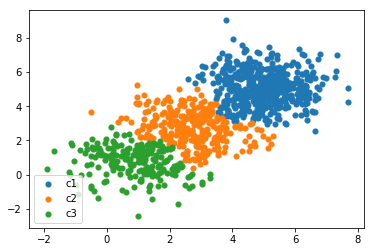

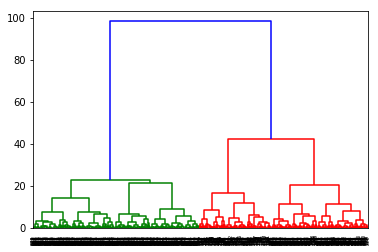

In [0]:
CAH = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clustering = CAH.fit(MIX_DATA)

Y_pred_cah = clustering.labels_

for o in np.unique(Y_pred_cah):
    plt.scatter(MIX_DATA[:, 0][Y_pred_cah == o],
                MIX_DATA[:, 1][Y_pred_cah == o],
                label='c'+str(o+1), lw=0.1)

plt.legend(loc=3)
plt.show()

Z = hierarchy.linkage(MIX_DATA, method='ward', metric='euclidean')

plt.figure()
dm = hierarchy.dendrogram(Z)
plt.show()

# Exercice sur données lettres
Dans cet exercice on va appliquer les algorithmes Kmeans et CAH sur des images représentants des lettres. Chaques image est modélisé par une matrice 28x28=784 pixels. Chaque pixel représente un niveau de gris. (dans le cas d'image en couleur on a 3 couche de pixel: une couche rouge, une couche verte, une couche bleu. 

 1/ importation image : dataset 
* Pour importer les images et les transformer on objet numpy on utilise matplotlib.pyplot.imread.
* Pour afficher une image on utilise matplotlib.pyplot.imread.imshow.
* La fonction numpy.ravel() permet d'applatire un vecteur.
Ci-dessous im1 représente l'image sous forme de matrice

In [0]:
images = os.listdir("/Users/danielhaik/Desktop/imagekmeans")
images = ["/Users/danielhaik/Desktop/imagekmeans/"+o for o in images]
X_image_vect = np.vstack([plt.imread(o).ravel() for o in images])

In [0]:
X_image_vect.shape

(2800, 784)

2/Appliquer une regle du coude pour déterminer le nombre de classe optimum. Dans la suite on admettra que le nombre optimum de classe est 4. On oublira pas de mettre à l'echelle les données (StandardScaler()).

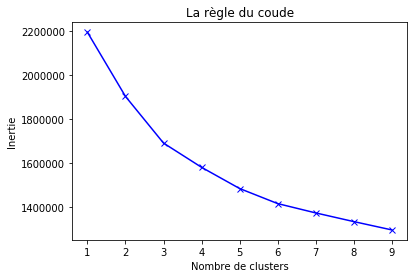

In [0]:
X_image_vect_stand = StandardScaler().fit_transform(X_image_vect)

inertie = [KMeans(n_clusters=k, max_iter=2000, n_init=100).fit(X_image_vect_stand).inertia_ for k in nb_clus]
plt.plot(nb_clus, inertie, 'bx-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('La règle du coude')
plt.show()

3/Représenter les données X_image_vect à l'aide dun TSNE à 2 composantes. On utilise les données X_image_vect.

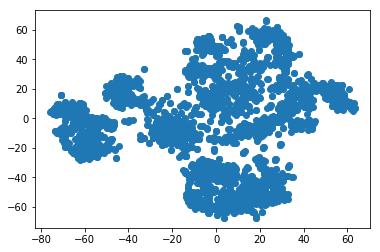

In [0]:
t_sne = TSNE(n_components=2, random_state=1998)
X_image_vect_tsne = t_sne.fit_transform(X_image_vect)
plt.scatter(X_image_vect_tsne[:, 0], X_image_vect_tsne[:, 1])

4/Faite un kmeans dont le nombre de cluster est 4. Ce modele s'appelle kmean4. Il faut entrainer ce modele. Ensuite afficher kmean4.labels

In [0]:
kmeans4 = KMeans(n_clusters=4, max_iter=2000, n_init=100).fit(X_image_vect)
labels = kmeans4.labels_

5/ Représenter les données avec leurs labels en utilisant un TSNE. Une couleur par label.

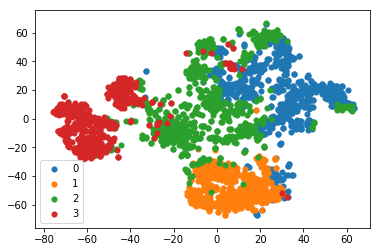

In [0]:
for l in np.unique(labels):
    plt.scatter(X_image_vect_tsne[:, 0][labels == l], X_image_vect_tsne[:, 1][labels == l], label=str(l), lw=0.1)
plt.legend(loc=3)
plt.show()

6/Afficher les données de 4 images ayant le label 0.

On va générer aléatoirement 4 images ayant le label 0.

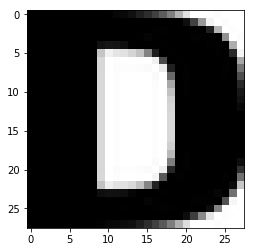

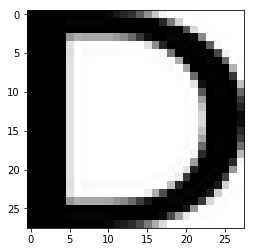

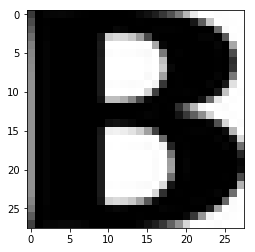

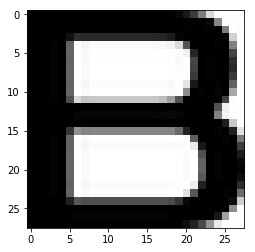

In [0]:
im_0 = X_image_vect[labels == 0, :]
im_0 = [np.array(o).reshape(28, 28) for o in im_0]
len(im_0)
for i in np.random.uniform(0,len(im_0),4):
    plt.imshow(im_0[int(i)], cmap='binary')
    plt.show()

7/Faite comme dans la quetion précédante mais pour la classe 3. Conclure. 

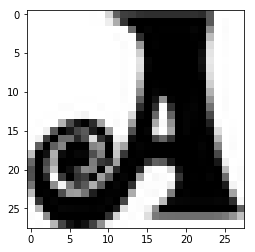

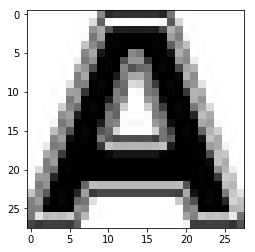

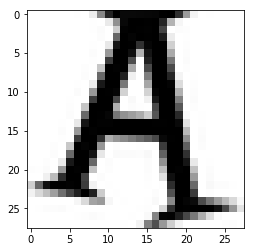

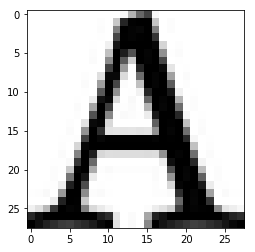

In [0]:
im_3 = X_image_vect[labels == 3, :]
im_3 = [np.array(o).reshape(28, 28) for o in im_3]
len(im_3)
for i in np.random.uniform(0,len(im_3),4):
    plt.imshow(im_3[int(i)], cmap='binary')
    plt.show()

Il semble que Kmean à bien identifié les lettres A comme appartenant à la classe 3.


Cependant, il a plus de mal à détecter les autres lettres, la classe 0 contient beaucoup de B et D.